# Week 9: Independent Lab
Author: Jen Estes \
Course: BGEN 632 - Introduction to Python \
Term: Spring 2025 \
Due Date: April 28th, 2025 

This notebook contains code for implementing statistical approaches in Python based on the requirements outlined by Dr. Newton in the BGEN632 Week 9 GitHub repo. While using the [ect_data.txt](/data/ect_data.txt) dataset, this program creates a linear regression model to investigate the impact of explanatory variables on the response variable of `intent1_01`.

### Notebook Setup
----

In [8]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [9]:
# set working directory
os.chdir("/Users/jenestes/Desktop/week9labs/data")   
os.getcwd()  # confirm change

'/Users/jenestes/Desktop/week9labs/data'

## Loading Data 
This section of my programs loads the data and does a quick inspection of the variables, summary statistics, and correlations. 

In [12]:
# load data and inspect
ect_data = pd.read_csv("ect_data.txt", delimiter = "\t")
ect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


In [15]:
# summary statistics
ect_data.describe()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.094527,6.044776,5.791045,5.890547,6.199005,6.044776,6.258706,5.840796,5.890547,5.601990,5.920398,5.731343,5.512438,5.562189,5.487562,5.343284
std,0.935959,1.073771,1.070570,1.008940,1.019901,1.167470,0.939540,1.069826,1.076086,1.220982,1.154830,1.211389,1.118523,1.160760,1.212887,1.093877
min,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000
25%,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [17]:
# correlation matrix of all variables
ect_data.corr()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
attitude1_01,1.000000,0.781832,0.748347,0.709922,0.666356,0.687054,0.654357,0.684226,0.576265,0.593120,0.622239,0.591388,0.569608,0.549134,0.483329,0.515116
attitude1_02,0.781832,1.000000,0.660611,0.622986,0.603616,0.704362,0.647626,0.650416,0.480259,0.547582,0.615780,0.551287,0.513672,0.517255,0.466889,0.523213
attitude1_03,0.748347,0.660611,1.000000,0.858235,0.519099,0.571588,0.471573,0.612550,0.453128,0.483051,0.544584,0.511677,0.519945,0.545646,0.463918,0.539753
attitude1_04,0.709922,0.622986,0.858235,1.000000,0.512032,0.560253,0.483636,0.581335,0.454046,0.492102,0.537477,0.495368,0.515158,0.518164,0.423812,0.478193
intent1_01,0.666356,0.603616,0.519099,0.512032,1.000000,0.886908,0.827830,0.757793,0.566642,0.529681,0.595103,0.488655,0.545688,0.500534,0.430458,0.494192
intent1_02,0.687054,0.704362,0.571588,0.560253,0.886908,1.000000,0.832684,0.786367,0.517334,0.489604,0.584902,0.478759,0.518394,0.505258,0.471791,0.508628
intent1_03,0.654357,0.647626,0.471573,0.483636,0.827830,0.832684,1.000000,0.722675,0.537531,0.552217,0.581282,0.513861,0.529800,0.466569,0.441605,0.472635
intent1_04,0.684226,0.650416,0.612550,0.581335,0.757793,0.786367,0.722675,1.000000,0.497286,0.521588,0.544137,0.491533,0.590820,0.555600,0.460866,0.628003
peruse01,0.576265,0.480259,0.453128,0.454046,0.566642,0.517334,0.537531,0.497286,1.000000,0.746810,0.753397,0.683090,0.399931,0.321710,0.198159,0.295438
peruse02,0.593120,0.547582,0.483051,0.492102,0.529681,0.489604,0.552217,0.521588,0.746810,1.000000,0.732724,0.728517,0.483252,0.423262,0.287002,0.391069


### Assumption Validation
This section of my program tests the following assumptions for creating a regression model:
* Linearity: linear relationship exists
* Correlation: the independent variables (i.e., explanatory or predictor variables) are not related to each other
* Homoscedasticity: residuals exhibit a constant variance
* Independence: residuals are not related to each other
* Normality: residuals exhibit a normal distribution

The target variable is `intent1_01`, and the planned independent variables are: `attitude1_01`, `attitude1_03`, `peruse03`, `satis02` and `satis04`. 

## Linearity
To see if a linear relationship exists between the target variable and each independent variable, I create a scatterplot and calculate the correlation between each pair. 

<Axes: xlabel='attitude1_01', ylabel='intent1_01'>

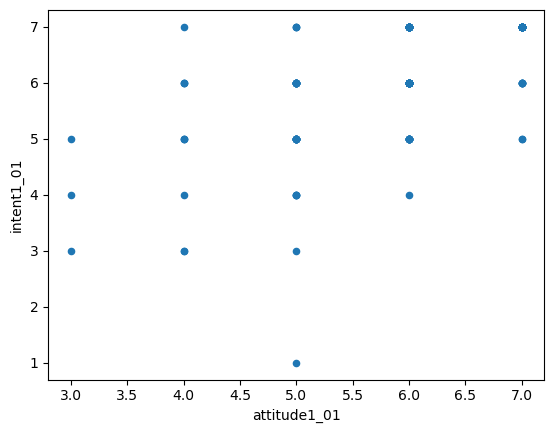

In [22]:
# scatterplot for intent1_01 and attitude1_01
ect_data.plot.scatter(x='attitude1_01', y='intent1_01')

In [24]:
# correlation for intent1_01 and attitude1_01
ect_data['intent1_01'].corr(ect_data['attitude1_01'])

0.6663562202246981

From the scatterplot and correlation calculation above, we can see that a positive, linear relationship exists between `intent1_01` and `attitude1_01`. 

<Axes: xlabel='attitude1_03', ylabel='intent1_01'>

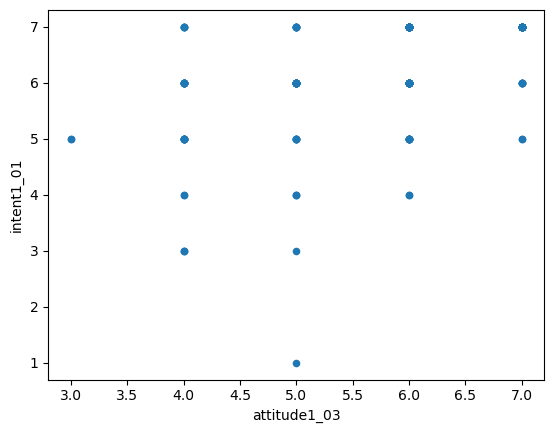

In [27]:
# scatterplot for intent1_01 and attitude1_03
ect_data.plot.scatter(x='attitude1_03', y='intent1_01')

In [29]:
# correlation for intent1_01 and attitude1_03
ect_data['intent1_01'].corr(ect_data['attitude1_03'])

0.5190985674786963

From the scatterplot and correlation calculation above, we can see that a positive, linear relationship exists between `intent1_01` and `attitude1_03`. 

<Axes: xlabel='peruse03', ylabel='intent1_01'>

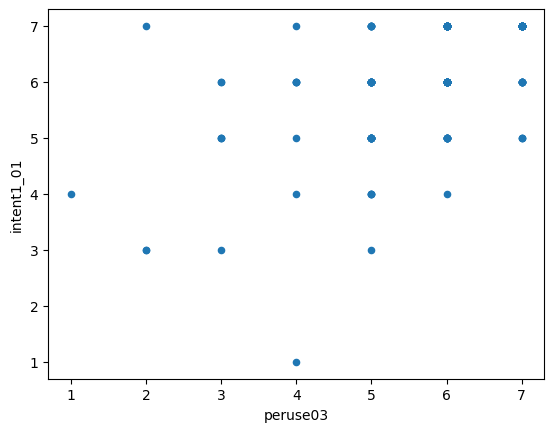

In [32]:
# scatterplot for intent1_01 and peruse03
ect_data.plot.scatter(x='peruse03', y='intent1_01')

In [34]:
# correlation for intent1_01 and peruse03
ect_data['intent1_01'].corr(ect_data['peruse03'])

0.5951034992816792

From the scatterplot and correlation calculation above, we can see that a positive, linear relationship exists between `intent1_01` and `peruse03`. 

<Axes: xlabel='satis02', ylabel='intent1_01'>

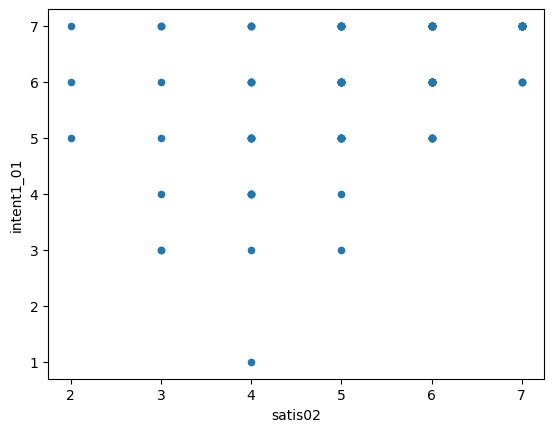

In [37]:
# scatterplot for intent1_01 and satis02
ect_data.plot.scatter(x='satis02', y='intent1_01')

In [39]:
# correlation for intent1_01 and satis02
ect_data['intent1_01'].corr(ect_data['satis02'])

0.5005337666384357

From the scatterplot and correlation calculation above, we can see that a positive, linear relationship exists between `intent1_01` and `satis02`. 

<Axes: xlabel='satis04', ylabel='intent1_01'>

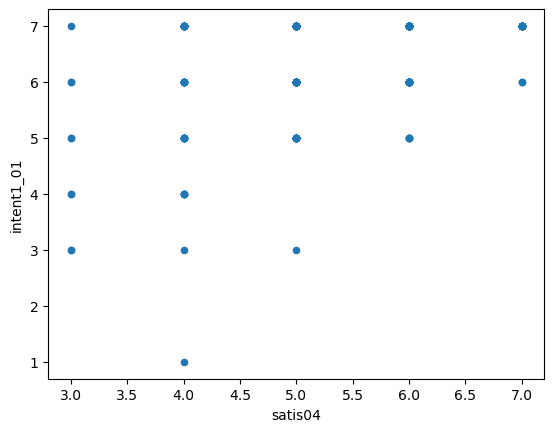

In [42]:
# scatterplot for intent1_01 and satis04
ect_data.plot.scatter(x='satis04', y='intent1_01')

In [91]:
# correlation for intent1_01 and satis04
ect_data['intent1_01'].corr(ect_data['satis04'])

0.49419156782544804

From the scatterplot and correlation calculation above, we can see that a positive, linear relationship exists between `intent1_01` and `satis04`. 

## Collinearity
This section of my program tests the assumption of collinearity, which is the idea that the independent variables cannot be correlated with one another. To test this, I calculate the correlation between each pair of independent variables: `attitude1_01`, `attitude1_03`, `peruse03`, `satis02` and `satis04`. 

In [45]:
pearsonr(ect_data.attitude1_01, ect_data.attitude1_03)

PearsonRResult(statistic=0.7483468062141385, pvalue=2.497305572469167e-37)

In [47]:
pearsonr(ect_data.attitude1_01, ect_data.peruse03)

PearsonRResult(statistic=0.6222393669636351, pvalue=6.225185511710757e-23)

In [49]:
pearsonr(ect_data.attitude1_01, ect_data.satis02)

PearsonRResult(statistic=0.5491337420088274, pvalue=3.155126872921584e-17)

In [51]:
pearsonr(ect_data.attitude1_01, ect_data.satis04)

PearsonRResult(statistic=0.5151156758909828, pvalue=5.1241722090200014e-15)

In [53]:
pearsonr(ect_data.attitude1_03, ect_data.peruse03)

PearsonRResult(statistic=0.5445842965767239, pvalue=6.445719480039763e-17)

In [55]:
pearsonr(ect_data.attitude1_03, ect_data.satis02)

PearsonRResult(statistic=0.5456456075787439, pvalue=5.4615251678809564e-17)

In [57]:
pearsonr(ect_data.attitude1_03, ect_data.satis04)

PearsonRResult(statistic=0.5397530922293898, pvalue=1.3603199671267022e-16)

In [59]:
pearsonr(ect_data.peruse03, ect_data.satis02)

PearsonRResult(statistic=0.45877234750027523, pvalue=7.424642541725985e-12)

In [61]:
pearsonr(ect_data.peruse03, ect_data.satis04)

PearsonRResult(statistic=0.4294210723582487, pvalue=2.003790965829837e-10)

In [63]:
pearsonr(ect_data.satis02, ect_data.satis04)

PearsonRResult(statistic=0.7687035076610144, pvalue=1.7426976665473815e-40)

The results above present the correlation between each set of independent variables used in the regression model, along with the p-value to determine if the correlation is statistically significant. There are a few pairs of variables that raise some concern because of their strong correlation. The variables `attitude1_01` and `attitude1_03` have a correlation of 0.75 and the variables `satis02` and `satis04` have a correlation of 0.77. This is likely due to the variables coming from the same section of data and potentially asking about similar things from the respondents, since the first set are both attitude variables and the second are both satisfaction variables. In order to further examine collinearity, I also perform VIF scores. 

In [66]:
# use the sklearn library for regression
lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_03', 'peruse03', 'satis02', 'satis04']], ect_data.intent1_01)

# calculate VIF for attitude1_01
lin_reg_1.fit(ect_data[['attitude1_03', 'peruse03', 'satis02', 'satis04']], ect_data.attitude1_01)
vif1 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_03', 'peruse03', 'satis02', 'satis04']], ect_data.attitude1_01))

# calculate VIF for attitude1_03
lin_reg_1.fit(ect_data[['attitude1_01', 'peruse03', 'satis02', 'satis04']], ect_data.attitude1_03)
vif2 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'peruse03', 'satis02', 'satis04']], ect_data.attitude1_03))

# calculate VIF for peruse03
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_03', 'satis02', 'satis04']], ect_data.peruse03)
vif3 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_03', 'satis02', 'satis04']], ect_data.peruse03))

# calculate VIF for satis02
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_03', 'peruse03', 'satis04']], ect_data.satis02)
vif4 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_03', 'peruse03', 'satis04']], ect_data.satis02))

# calculate VIF for satis04
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_03', 'satis02', 'peruse03']], ect_data.satis04)
vif5 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_03', 'satis02', 'peruse03']], ect_data.satis04))


# output VIF scores
print('VIF attitude1_01: ', vif1,
        '\nVIF attitude1_03: ', vif2,
        '\nVIF peruse03: ', vif3,
     '\nVIF satis02: ', vif4,
        '\nVIF satis04: ', vif5)

VIF attitude1_01:  2.7650180927806627 
VIF attitude1_03:  2.4990687772336284 
VIF peruse03:  1.710659306345955 
VIF satis02:  2.689995787682194 
VIF satis04:  2.5825028495413003


From the VIF scores above, it is clear that some of our independent variables are somewhat correlated with one another, as the scores range from the lowest at 1.71 to the highest at 2.77. However, these scores are all still relatively small, so I will continue modeling using these independent variables. 

## Homoscedasticity
This section of my program evaluates the assumption of homoscedasticity, which is the idea that the spread of the residuals should be constant across the different independent variables. To look at this, I will plot the residual values against the fitted/predicted values and evaluate the spread of the data points. 

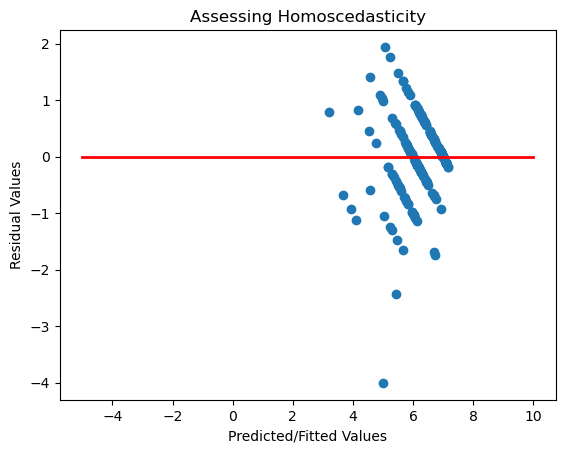

In [70]:
# regression model
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_03 + peruse03 + satis02 + satis04', ect_data).fit()

# assess homoscedasticity
plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-5, 10],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

Looking at the plot above, the red line is generated to show a zero-residual line, which would be the case if all the predicted values from the model were identical to the actual values. The data points are somewhat evenly distributed across the x-axis, but there are a few data points causing a large spread. These variables could be outliers in the data. 

## Independence
This section of my program evaluates the condition of independence, which is that the residuals should not be correlated with one another. To test this, I will find the Durbin-Watson test statistic. 

In [74]:
# model summary to get Durbin-Watson score
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     42.30
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.22e-29
Time:                        10:33:40   Log-Likelihood:                -214.85
No. Observations:                 201   AIC:                             441.7
Df Residuals:                     195   BIC:                             461.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2239      0.350      3.496      0.001       0.534       1.914
attitude1_01     0.4857      0.090      5.405      0.000       0.308       0.663
attitude1_03    -0.0663      0.075     -0.888      0.376      -0.214       0.081
peruse03         0.2353      0.057      4.108      0.000       0.122       0.348
satis02          0.0584      0.071      0.817      0.415      -0.083       0.199
satis04          0.1274      0.074      1.714      0.088      -0.019       0.274
==============================================================================
Omnibus:                       57.801   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.546
Skew:                          -1.032   Prob(JB):                     5.32e-56
Kurtosis:                       8.112   Cond. No.                         91.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results above show that the Durbin-Watson test statistic is 1.91, which falls within the acceptable range of 1.5 to 2.5. If this value was outside of the range (especially if under 1 or over 3), then there would be a cause for concern. 

## Normality
This section of my program looks at the last assumption, which is that of normally distributed residuals. I assess this by creating a QQ or "Probability Plot". 

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

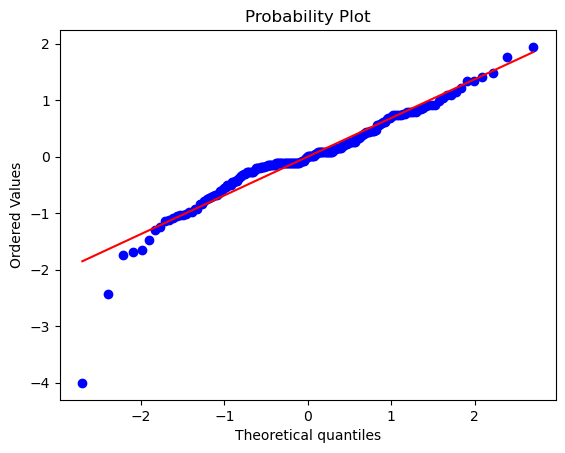

In [78]:
sts.probplot(lin_reg_2.resid, dist="norm", plot=plt)

The plot above suggests that the residuals do follow the pattern of a normal distribution, as the blue circles for my data points closely follow the red line that shows a normal distribution. There are a few data points at the tails that stand out, and these are likely the same ones from the test of a constant variance. 

## Assessing the Model
This section of my program presents the final linear regression model using the specified independent variables to predict the target variable `intent1_01`. The results of the model are outlined, explained, and interpreted. 

In [82]:
lin_reg = smf.ols('intent1_01 ~ attitude1_01 + attitude1_03 + peruse03 + satis02 + satis04', ect_data).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     42.30
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.22e-29
Time:                        10:33:59   Log-Likelihood:                -214.85
No. Observations:                 201   AIC:                             441.7
Df Residuals:                     195   BIC:                             461.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2239      0.350      3.496      0.001       0.534       1.914
attitude1_01     0.4857      0.090      5.405      0.000       0.308       0.663
attitude1_03    -0.0663      0.075     -0.888      0.376      -0.214       0.081
peruse03         0.2353      0.057      4.108      0.000       0.122       0.348
satis02          0.0584      0.071      0.817      0.415      -0.083       0.199
satis04          0.1274      0.074      1.714      0.088      -0.019       0.274
==============================================================================
Omnibus:                       57.801   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.546
Skew:                          -1.032   Prob(JB):                     5.32e-56
Kurtosis:                       8.112   Cond. No.                         91.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### F-Test
The results above present the final linear regression model, and we can see the *F*-statistic value is `42.30` and it's *p*-value is `2.22e-29`. This F-statistic is statistically significant considering *p*-value < .05, and the value of `42.30` gives us an idea of how much of the variation in `intent1_01` is explained by the model (attitude1_01 + attitude1_03 + peruse03 + satis02 + satis04). The R-squared value can also give us this information, with the adjusted R-squared telling us that the model is predicting about 50.8% of variation in our target variable. The final results are summarized:

* *F*(5, 195) = 42.30 (*p* < .0001)

### T-Tests
Below are the results for the t-tests for each of the independent variables:
* attitude1_01: *t* = 5.405 (*p* < .0001)
* attitude1_03: *t* = -0.888 (*p* = .376)
* peruse03: *t* = 4.108 (*p* < .0001)
* satis02: *t* = 0.817 (*p* = .415)
* satis04: *t* = 1.714 (*p* = 0.088)

Based on these results, the variables `attitude1_01` and `peruse03` are highly statistically significant, and the variable `satis04` is weakly statistically significant (p<.1). The two statistically significant variables `attitude1_01` and `peruse03` are significant because they have a clear impact on the target variable `intent1_01`. These two variables also have the highest coefficient values of all independent variables, which are `0.4857` and `0.2353`, respectively. This means for a 1 point increase in `attitude1_01`, we would expect `intent1_01` to increase by 0.4857. Similarly, for a 1 point increase in `peruse03`, we would expect `intent1_01` to increase by 0.2353. 

## Interpreting the Model
We can construct the regression equation as follows:

> intent1_01 = 1.22 + 0.49 attitude1_01  - 0.07 attitude1_03 + 0.24	peruse03 + 0.06 satis02 + 0.13 satis04

To interpret this equation:

1. If attitude1_01 increases by 1, intent1_01 will increase by 0.49.
2. If attitude1_03 increases by 1, intent1_01 will decrease by 0.07.
3. If peruse03 increases by 1, intent1_01 will increase by 0.24.
4. If satis02 increases by 1, intent1_01 will increase by 0.06.
5. If satis04 increases by 1, intent1_01 will increase by 0.13.

> However, it is important to remember the section above regarding the T-tests and which variables are statistically significant.



### Lab Complete!